In [1]:
import numpy as np
import matplotlib.pyplot as plt
fontsize_label = 30
fontsize_title = 30
fontsize_tick = 28
fontfamily = 'Arial'
axiswidth = 3
linewidth = 3
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Cv plot

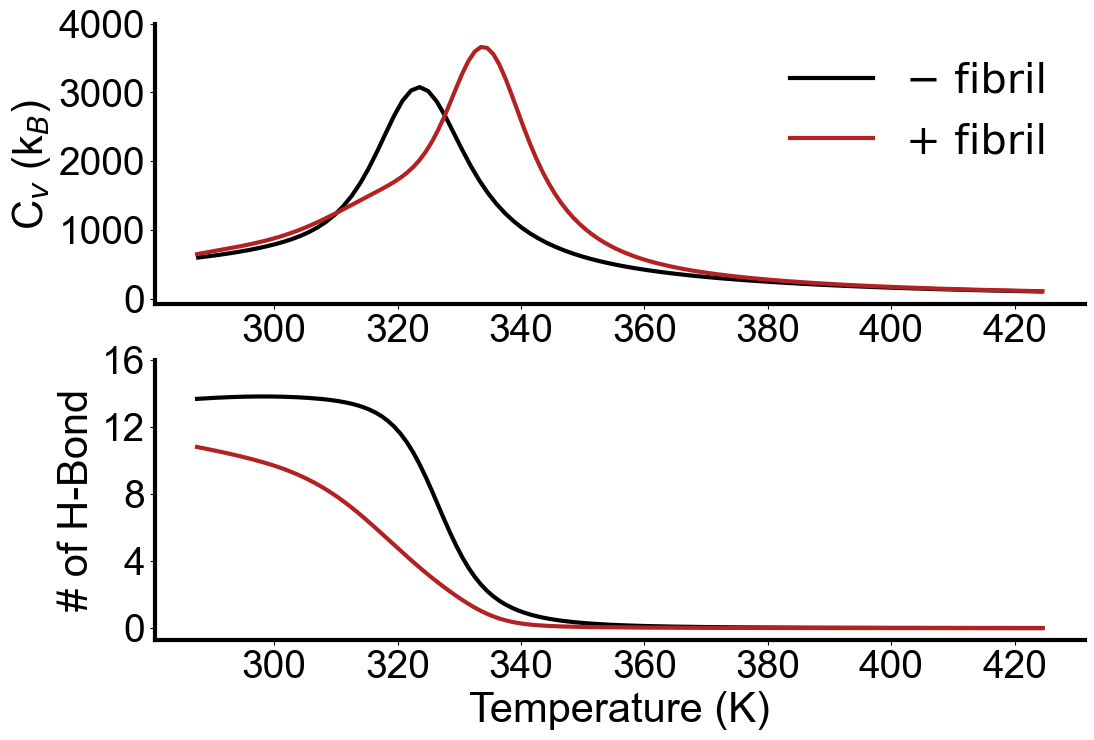

In [2]:
fig,axes = plt.subplots(figsize=(12,8),ncols=1,nrows=2)
ctrl = np.loadtxt('./dimer_replica_Ab/alldata/cv.dat').T
cv = np.loadtxt('./IAPP-fibril-replica-dimer/all/cv.dat').T
hb = np.loadtxt('./IAPP-fibril-replica-dimer/all/ave_dimhb.dat').T
hb_ctrl = np.loadtxt('./dimer_replica_Ab/alldata/ave_dimhb.dat').T
data_cv = [ctrl,cv]
data_hb = [hb_ctrl,hb]

label = [u'\u2212 fibril','+ fibril']
colors = ['k','firebrick']
for i in range(2):
    temp = data_cv[i][0]
    cv = data_cv[i][1]
    err = data_cv[i][3]
    axes[0].plot(temp,cv*500,label=label[i],linewidth=linewidth,color=colors[i])
    #axes[0].errorbar(temp,cv,yerr=err**0.5,fmt='none',capsize=1,ecolor='grey')
    #axes[0].legend(frameon=False,fontsize=fontsize_label)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

for i in range(2): 
    temp = data_hb[i][0]
    cv = data_hb[i][1]
    err = data_hb[i][2]
    axes[1].plot(temp,cv,label=label[i],linewidth=linewidth,color=colors[i])
    #axes[1].errorbar(temp,cv,yerr=(err/24)**0.5,fmt='none',capsize=1,ecolor='lightgrey')
axes[0].legend(frameon=False,fontsize=fontsize_label)
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for lb in ax.get_xticklabels():
        lb.set_fontsize(fontsize_tick)
        #lb.set_fontweight('bold')
        lb.set_fontname(fontfamily)
    for lb in ax.get_yticklabels():
        lb.set_fontsize(fontsize_tick)
        #lb.set_fontweight('bold')
        lb.set_fontname(fontfamily) 
    for spine in ax.spines.values():
        spine.set_linewidth(axiswidth)
    ax.set_yticks(ax.get_yticks()[1::2])

axes[1].set_xlabel('Temperature (K)',fontsize=fontsize_label,family=fontfamily)
axes[0].set_ylabel(r'C$_{v}$ (k$_{B}$)',fontsize=fontsize_label,family=fontfamily)
axes[1].set_ylabel('# of H-Bond',fontsize=fontsize_label,family=fontfamily)
plt.savefig('./IAPP-fibril-replica-dimer/Cv_dimer.png',dpi=220,transparent=True)

# Interchain contact map

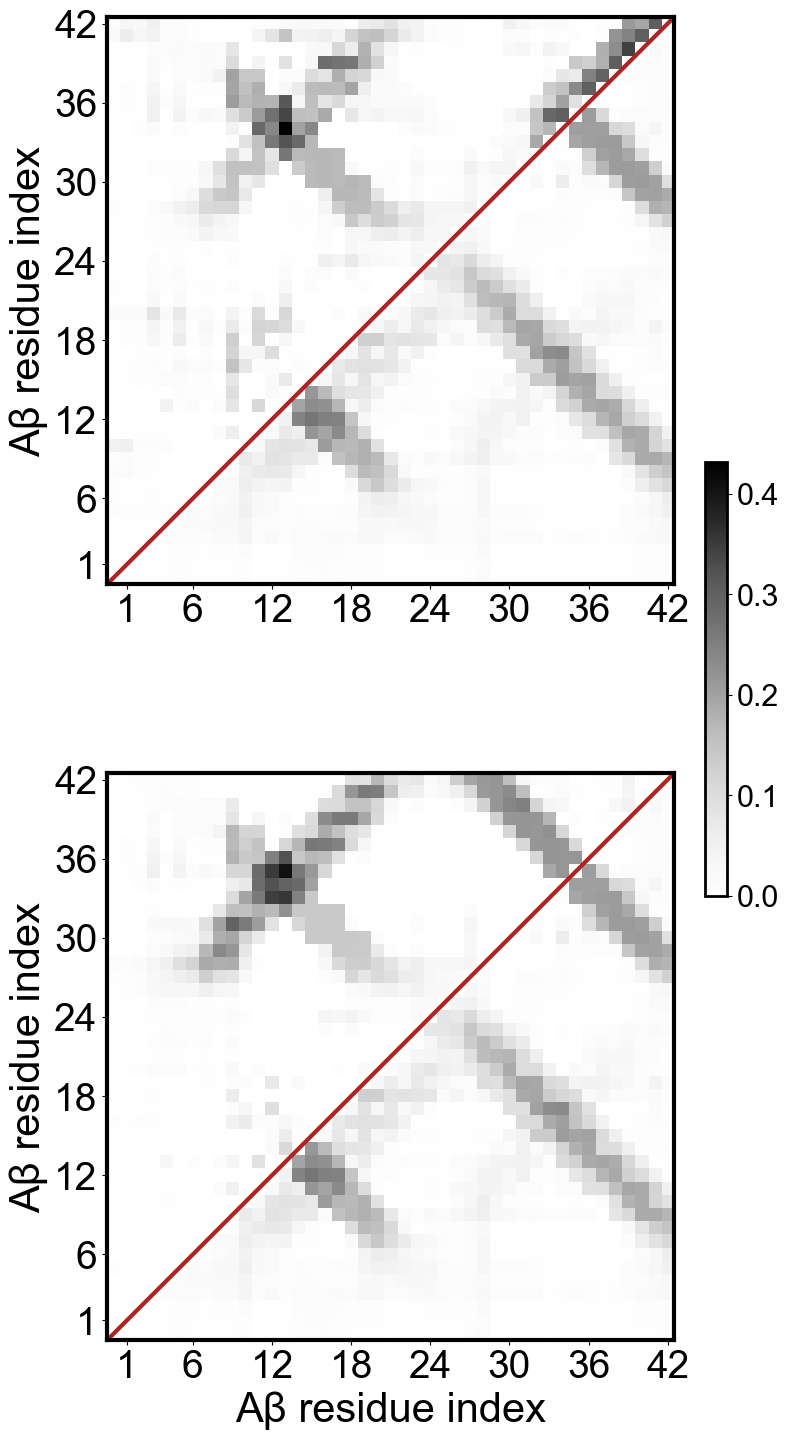

In [6]:
mask_end = np.loadtxt('./IAPP-fibril-replica-dimer/end/ave_mask.dat')[13,1]
mask_side = np.loadtxt('./IAPP-fibril-replica-dimer/side/ave_mask.dat')[13,1]
mask_ctrl = np.loadtxt('./dimer_replica_Ab/condi/ave_mask.dat')[13,1]

end_data = (np.loadtxt('./IAPP-fibril-replica-dimer/end/RW_rctdim_300.txt')[:,0]/mask_end).reshape((42,42))
#gain the upper diagonal matrix and creat boundary diagonal
end_data  = np.pad(np.triu((end_data + end_data.T)/2,0).T,((1,0),(0,1))) 

side_data = (np.loadtxt('./IAPP-fibril-replica-dimer/side/RW_rctdim_300.txt')[:,0]/mask_side).reshape((42,42))
#gain the upper diagonal matrix and creat boundary diagonal
side_data  = np.pad(np.triu((side_data + side_data.T)/2,0).T,((1,0),(0,1)))

ctrl = (np.loadtxt('./dimer_replica_Ab/condi/RW_resct_300.txt')[:,0]/mask_ctrl).reshape((42,42))
titles = ['elongation binding','lateral binding',' Ctrl']
#gain the lower diagonal matrix and creat boundary diagonal
ctrl  = np.pad(np.triu((ctrl + ctrl.T)/2,0),((0,1),(1,0)))

data = [end_data+ctrl,side_data+ctrl]
vmin = 0
vmax = max([x.max() for x in data])
fig,axes = plt.subplots(figsize=(8,18),nrows=2, ncols=1)
for i in range(2):
    heatm = axes[i].imshow(data[i],vmin=vmin,vmax=vmax,cmap='Greys',origin='lower')
    axes[i].set_xticks(np.linspace(1,42,8,dtype=int))
    axes[i].set_xticklabels(np.linspace(1,42,8,dtype=int))
    axes[i].set_yticks(np.linspace(1,42,8,dtype=int))
    axes[i].set_yticklabels(np.linspace(1,42,8,dtype=int))
    #axes[i].set_title(titles[i],fontsize=fontsize_title)
    axes[i].axline((0, 0), slope=1, color="firebrick", linewidth=linewidth)
    axes[i].set_ylabel('Aβ residue index',fontsize=fontsize_label,family=fontfamily)

    for lb in axes[i].get_xticklabels():
        lb.set_fontsize(fontsize_tick)
        lb.set_fontname(fontfamily)
    for lb in axes[i].get_yticklabels():
        lb.set_fontsize(fontsize_tick)
        lb.set_fontname(fontfamily) 
    for spine in axes[i].spines.values():
        spine.set_linewidth(axiswidth)
cb = plt.colorbar(heatm, ax=axes, fraction=0.035,pad=0.05)
cb.ax.tick_params(labelsize=fontsize_tick)
for spine in cb.ax.spines.values():
    spine.set_linewidth(axiswidth-1)
for label in cb.ax.get_yticklabels():
    label.set_fontsize(fontsize_tick-6)
    label.set_fontfamily(fontfamily)
axes[1].set_xlabel('Aβ residue index',fontsize=fontsize_label,family=fontfamily)
#cb.set_label('Frequency',fontsize=fontsize_label)
plt.savefig('./IAPP-fibril-replica-dimer/interchain-ctmap.png',dpi=220,transparent=True)


# Intrachain contact map

0.8287910782970501


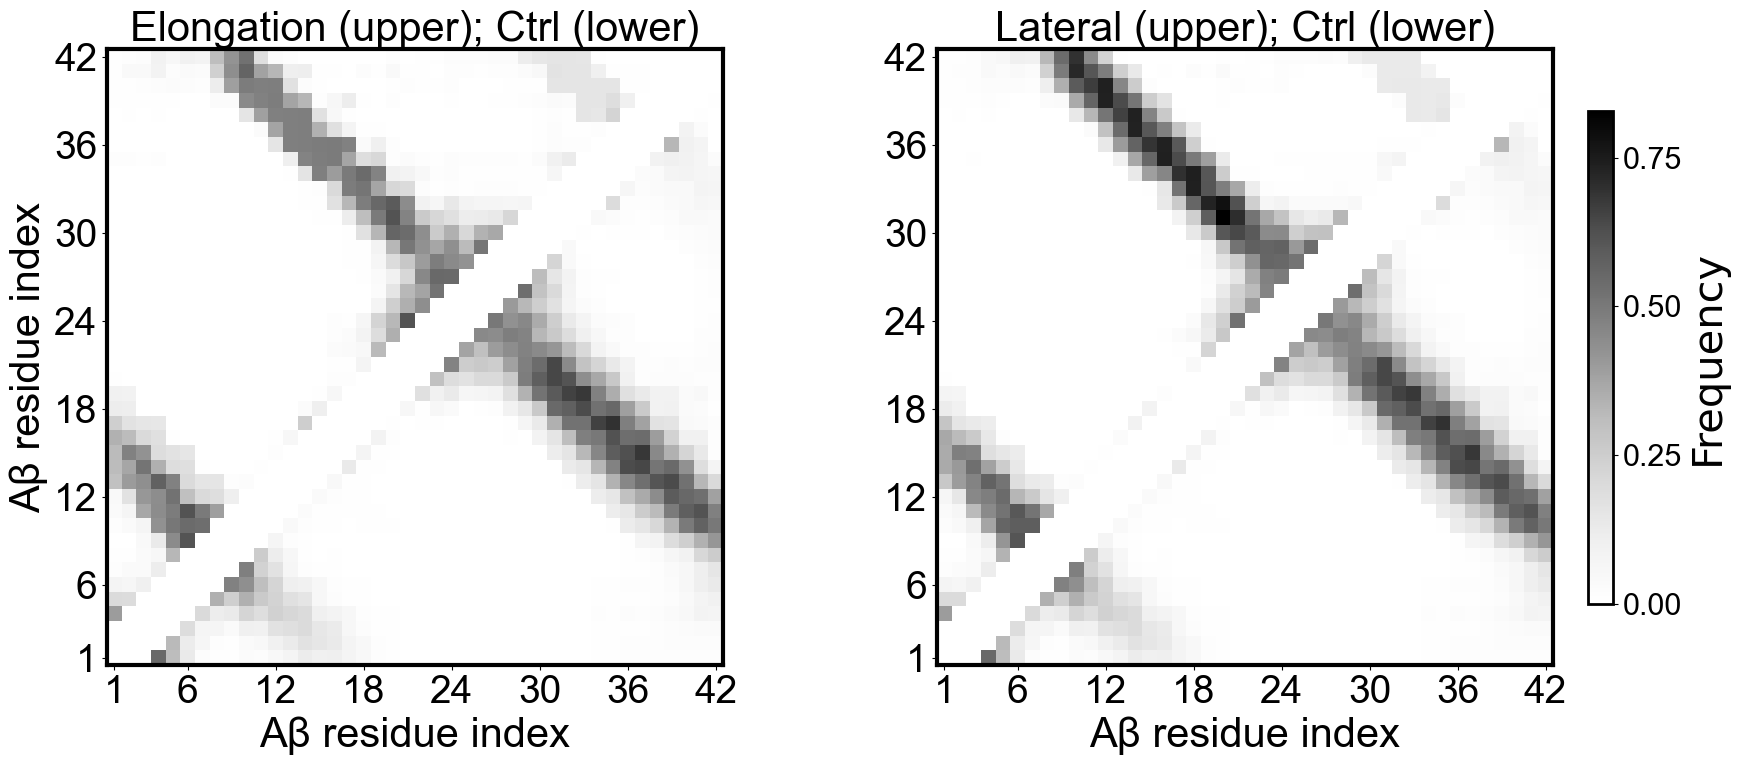

In [2]:
mask_end = np.loadtxt('./IAPP-fibril-replica-dimer/end/ave_mask.dat')[13,1]
mask_side = np.loadtxt('./IAPP-fibril-replica-dimer/side/ave_mask.dat')[13,1]
mask_ctrl = np.loadtxt('./dimer_replica_Ab/condi/ave_mask.dat')[13,1]
ctrl = np.loadtxt('./dimer_replica_Ab/condi/RW_inctm_300.txt')[:,0]/mask_ctrl
map2 = (np.loadtxt('./IAPP-fibril-replica-dimer/end/RW_inctm_300.txt')[:,0]/mask_end).reshape(42,42)
map3 = (np.loadtxt('./IAPP-fibril-replica-dimer/side/RW_inctm_300.txt')[:,0]/mask_side).reshape(42,42)
map5 = np.zeros((42,42))
for i in range(1,43):
    for j in range(i,43):
        if i == j:
            map5[i-1,j-1] = 0
        else:
            map5[i-1,j-1] = ctrl[j-i+int((84-i)*(i-1)/2)-1]
ctm_end = np.triu(map2,3).transpose()+map5
ctm_side = np.triu(map3,3).transpose()+map5
titles = ['Elongation (upper); Ctrl (lower)','Lateral (upper); Ctrl (lower)']
ctm = [np.where(x>=0.99,0,x) for x in [ctm_end,ctm_side]]
vmax = max([x.max() for x in ctm])
print(vmax)
fig, axes = plt.subplots(figsize=(20,8),nrows=1, ncols=2)
for ax,ct,title in zip(axes,ctm,titles):
    htm = ax.imshow(ct,cmap='Greys',origin='lower',vmin=0,vmax=vmax)
    ax.set_xticks(np.linspace(0,41,8,dtype=int))
    ax.set_xticklabels(np.linspace(0,41,8,dtype=int)+1,fontsize=fontsize_tick)
    ax.set_yticks(np.linspace(0,41,8,dtype=int))
    ax.set_yticklabels(np.linspace(0,41,8,dtype=int)+1,fontsize=fontsize_tick)
    ax.set_title(title,fontsize=fontsize_title,family=fontfamily)
    for lb in ax.get_xticklabels():
        lb.set_fontsize(fontsize_tick)
        lb.set_fontname(fontfamily)
    for lb in ax.get_yticklabels():
        lb.set_fontsize(fontsize_tick)
        lb.set_fontname(fontfamily) 
    for spine in ax.spines.values():
        spine.set_linewidth(axiswidth)
cb = plt.colorbar(htm, ax=axes[1], fraction=0.035,pad=0.05)
cb.ax.tick_params(labelsize=fontsize_tick)
cb.ax.set_yticks([0,0.25,0.5,0.75])
for spine in cb.ax.spines.values():
    spine.set_linewidth(axiswidth-1)
for label in cb.ax.get_yticklabels():
    label.set_fontsize(fontsize_tick-6)
    label.set_fontfamily(fontfamily)
for i in range(2):
    axes[i].set_xlabel('Aβ residue index',fontsize=fontsize_label,family=fontfamily)
axes[0].set_ylabel('Aβ residue index',fontsize=fontsize_label,family=fontfamily)
cb.set_label('Frequency',fontsize=fontsize_label)
plt.savefig('./IAPP-fibril-replica-dimer/intrachain-ctmap.png',dpi=220,transparent=True)

# RW 2ndst

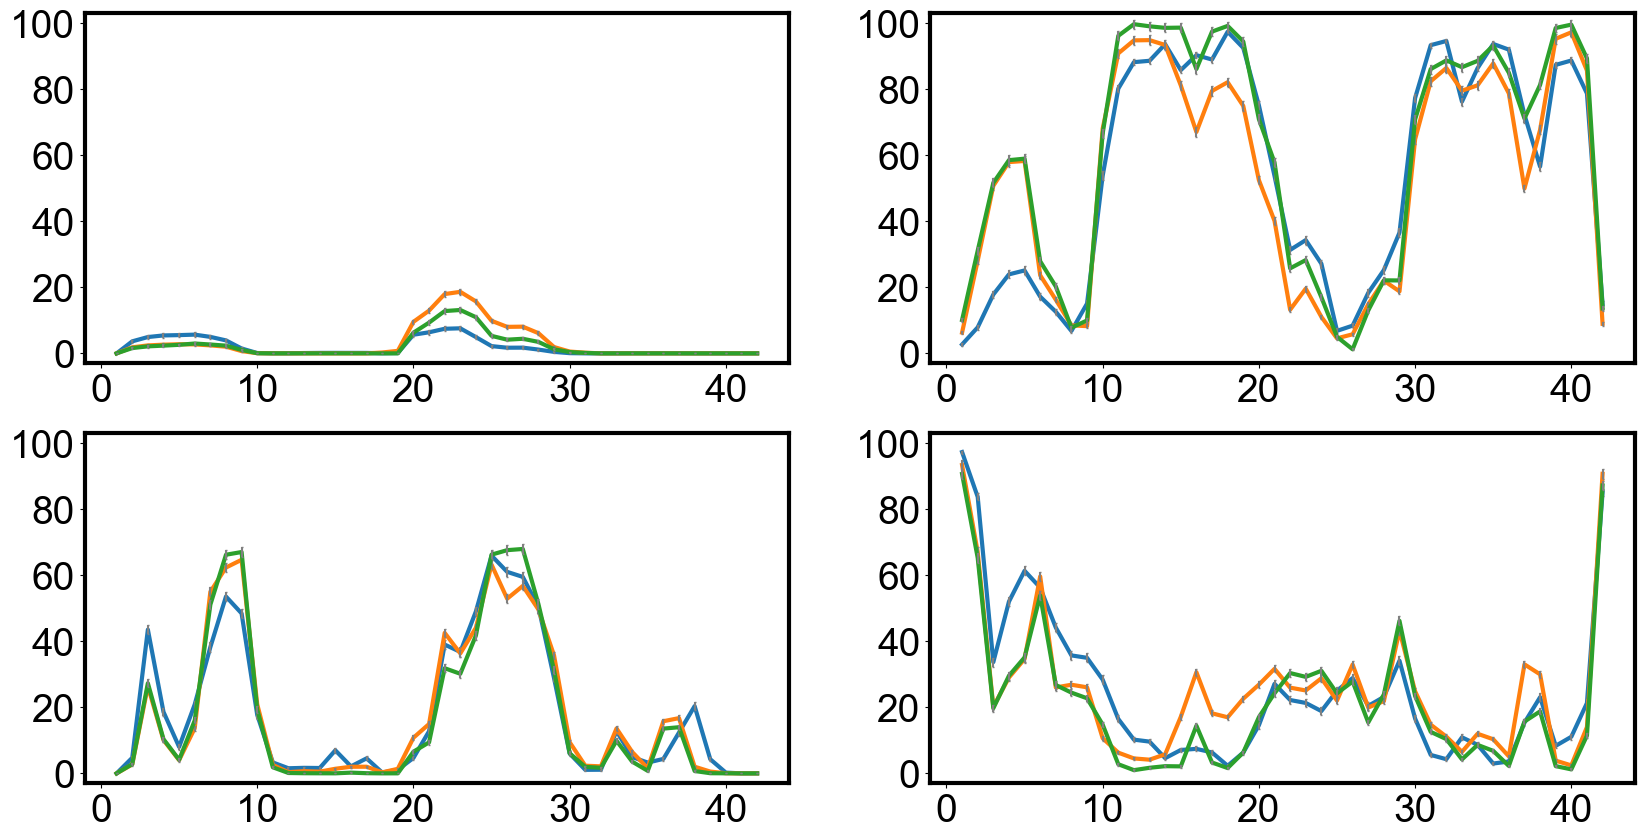

In [3]:
def SEM(array,replica):
    return (array/replica)**0.5
E = [np.loadtxt('./IAPP-fibril-replica-dimer/end/RW_{}_300.txt'.format(i)).T*100 for i in ['HE','BT','TN','UT']]
L = [np.loadtxt('./IAPP-fibril-replica-dimer/side/RW_{}_300.txt'.format(i)).T*100 for i in ['HE','BT','TN','UT']]
C = [np.loadtxt('./dimer_replica_Ab/condi/RW_{}_300.txt'.format(i)).T*100 for i in ['HE','BT','TN','UT']]
mask = [np.loadtxt('./IAPP-fibril-replica-dimer/end/ave_mask.dat')[13,1]]
mask.append(np.loadtxt('./IAPP-fibril-replica-dimer/side/ave_mask.dat')[13,1])
mask.append(np.loadtxt('./dimer_replica_Ab/condi/ave_mask.dat')[13,1])
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
fig,axes = plt.subplots(figsize=(20,10),ncols=2,nrows=2)
axes = axes.flatten()
resn = np.arange(1,43)
#stru = ['helices','β sheets']
groups = ['E Binding','L Binding', 'Ctrl']

for q in range(4):
    axes[q].plot(resn, (C[q][0][:42]+C[q][0][-42:])/2/mask[2],label=groups[2],color=colors[0],linewidth=linewidth)
    axes[q].errorbar(resn, (C[q][0][:42]+C[q][0][-42:])/2/mask[2],yerr=SEM(C[q][1][:42]+C[q][1][-42:],24),fmt='none',capsize=1,ecolor='grey')
    axes[q].plot(resn, (E[q][0][:42]+E[q][0][-42:])/2/mask[0],label=groups[0],color=colors[1],linewidth=linewidth)
    axes[q].errorbar(resn, (E[q][0][:42]+E[q][0][-42:])/2/mask[0],yerr=SEM(E[q][1][:42]+E[q][1][-42:],24),fmt='none',capsize=1,ecolor='grey')
    axes[q].plot(resn, (L[q][0][:42]+L[q][0][-42:])/2/mask[1],label=groups[1],color=colors[2],linewidth=linewidth)
    axes[q].errorbar(resn, (L[q][0][:42]+L[q][0][-42:])/2/mask[1],yerr=SEM(L[q][1][:42]+L[q][1][-42:],24),fmt='none',capsize=1,ecolor='grey')
    axes[q].set_ylim(-3,103)
    for lb in axes[q].get_xticklabels():
        lb.set_fontsize(fontsize_tick)
        lb.set_fontname(fontfamily)
    for lb in axes[q].get_yticklabels():
        lb.set_fontsize(fontsize_tick)
        lb.set_fontname(fontfamily) 
    for spine in axes[q].spines.values():
        spine.set_linewidth(axiswidth)

#axes[0].set_yticks(axes[0].get_yticks()[1::2])
#axes[1].set_xlabel('Aβ residue index',fontsize=fontsize_label,family=fontfamily)
#axes[0].legend(frameon=False,fontsize=fontsize_label-8,loc='upper left')
plt.savefig('./IAPP-fibril-replica-dimer/RW_2nd.png',dpi=220,transparent=True)

# Surface contact map of Abeta dimer

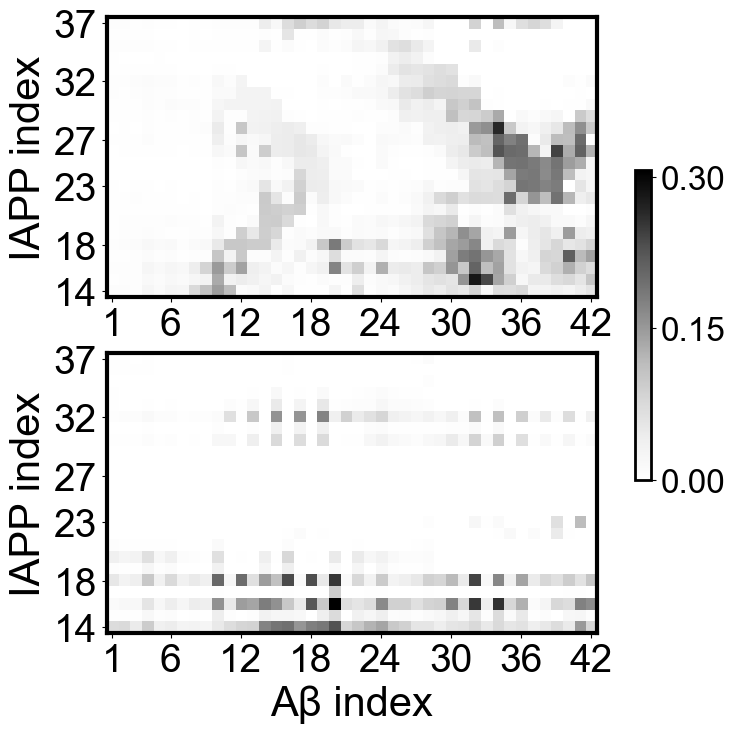

In [14]:
endctm = sum([np.loadtxt(f'./IAPP-fibril-replica-dimer/all/RW_{i}endctm_300.txt')[:,0] for i in [1,2]]).reshape(42,24).T/2
sidectm=sum([np.loadtxt(f'./IAPP-fibril-replica-dimer/all/RW_{i}sidectm_300.txt')[:,0] for i in [1,2]]).reshape(42,24).T/2
fig,axes = plt.subplots(figsize=(10,8),ncols=1,nrows=2)
vmax = max([x.max() for x in [endctm,sidectm]])
heatm = axes[0].imshow(endctm,vmin=0,vmax=vmax,cmap='Greys',origin='lower')
axes[1].imshow(sidectm,vmin=0,vmax=vmax,cmap='Greys',origin='lower')
cbar = plt.colorbar(heatm, ax=axes, fraction=0.02,pad=0.05)

for ax in axes:
    ax.set_xticks(np.linspace(0,41,8,dtype=int))
    ax.set_xticklabels(np.linspace(0,41,8,dtype=int)+1,fontsize=fontsize_tick,family=fontfamily)
    ax.set_yticks(np.linspace(0,23,6,dtype=int))
    ax.set_yticklabels(np.linspace(0,23,6,dtype=int)+14,fontsize=fontsize_tick,family=fontfamily)
    for spine in ax.spines.values():
        spine.set_linewidth(axiswidth)

for spine in cbar.ax.spines.values():
    spine.set_linewidth(axiswidth-1)
cbar.ax.set_yticks(cbar.ax.get_yticks()[::3])
#cbar.ax.set_yticklabels(cbar.ax.get_yticks()[::3])
for label in cbar.ax.get_yticklabels():
    #label.set_fontweight('bold')
    label.set_fontname(fontfamily)
    label.set_fontsize(fontsize_tick-4)
        
for i in range(2):
    axes[i].set_ylabel('IAPP index',fontsize=fontsize_label, family=fontfamily)
axes[1].set_xlabel('Aβ index',fontsize=fontsize_label, family=fontfamily)
plt.savefig('./IAPP-fibril-replica-dimer/dim_fib_surface_contact.png',dpi=220,transparent=True)



0.4599806480678472 0.46731477265252197


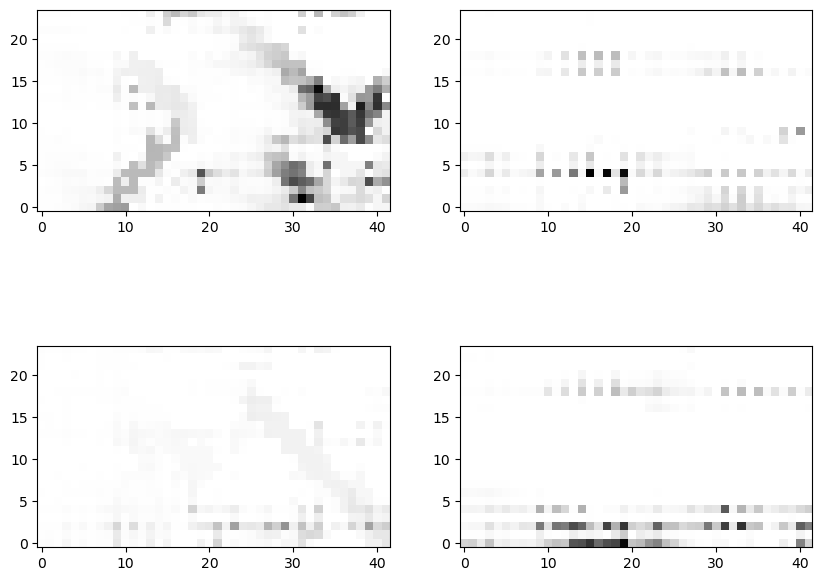

In [5]:
endctm = []
sidectm = []
for i in [1,2]:
    endctm.append(np.loadtxt(f'./all/RW_{i}endctm_300.txt')[:,0].reshape(42,24).T)
    sidectm.append(np.loadtxt(f'./all/RW_{i}sidectm_300.txt')[:,0].reshape(42,24).T)
fig,axes = plt.subplots(figsize=(10,8),ncols=2,nrows=2)
vmax_e = max([x.max() for x in endctm])
vmax_s = max([x.max() for x in sidectm])
print(vmax_e)
for i in range(2):
    axes[i,0].imshow(endctm[i],vmin=0,vmax=vmax_e,cmap='Greys',origin='lower')
    axes[i,1].imshow(sidectm[i],vmin=0,vmax=vmax_s,cmap='Greys',origin='lower')

